In [2]:
import multiprocessing
print(f'num cpus: {multiprocessing.cpu_count()}')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import sklearn.datasets

import frame_whitening as fw
import frame_whitening.plot as fwplt
from frame_whitening import simulation as fws

num cpus: 128


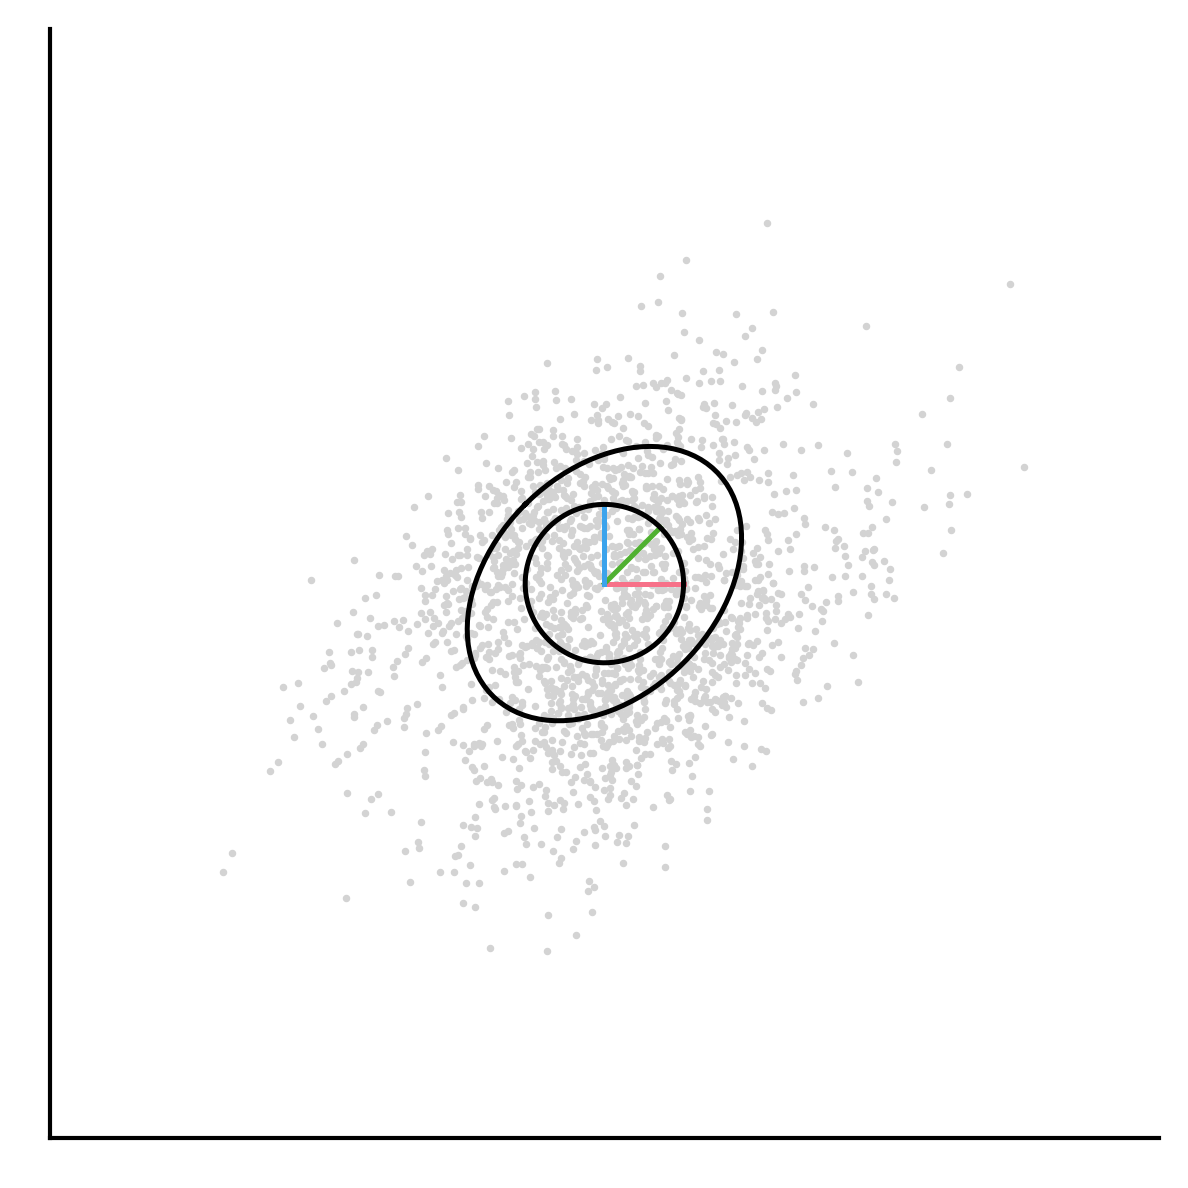

In [3]:
n_samples = 1000
N = 2
np.random.seed(42069)

X, y = sklearn.datasets.make_moons(n_samples=n_samples, noise=.28)

X = X - X.mean()

Cxx = np.array([
    [3, 1],
    [1, 3]
])

Lxx = sp.linalg.sqrtm(Cxx)

tmp = np.linalg.inv(np.cov(X.T))
L12 = np.linalg.cholesky(tmp)

Xw = X @ L12
X0 = Xw @ Lxx
np.cov(X0.T)

F = np.array([[1, 1/np.sqrt(2), 0],
              [0, 1/np.sqrt(2), 1]])

with sns.plotting_context("paper", font_scale=1.5):
  fig, ax = plt.subplots(1, 1, dpi=300, sharex="all", sharey="all")
  ax.scatter(*X0.T, color="lightgrey", s=1)
  ax.axis("square")
  fwplt.plot_ellipse(Cxx, n_pts=100, ax=ax, color="k", stdev=1.)

  cols = sns.color_palette("husl", 3)
  for i, f in enumerate(F.T):
    ax.plot([0, f[0]], [0, f[1]], color=cols[i])

  ax.scatter(*Xw.T, color="lightgrey", s=1)
  fwplt.plot_ellipse(np.eye(2), n_pts=100,  ax=ax, color="k", stdev=1.)
  axlim = 7
  ax.set(xticks=[], yticks=[], xlim=(-axlim,axlim), ylim=(-axlim, axlim))
  sns.despine()

#   fig.savefig("tmp.pdf")